In [39]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

import gc #garbage collector - before using this, ram was eaten with methods like pca

In [17]:
##### DEFAULT VALUES - CHANGEABLE #### 

#What is the meaning of the universe? Why is there something rather than nothing? answer= 42.
#I wanted to write 67 what Simha didn't understand the 67 joke... Tho she didn't understand the 42 neither 
sample_random_state = 42

In [4]:
df = pd.read_csv("flights.csv", low_memory=False) #we set "low memory" to false becuase we want pandas
#to load the whole dataset in one chunck before decding on datatype. 
print(df.shape)        # rows, columns
df.head()

(5819079, 31)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Making sure panda's data type loading was correct
print(df["ORIGIN_AIRPORT"].head(10))
print(df["ORIGIN_AIRPORT"].dtype)


0    ANC
1    LAX
2    SFO
3    LAX
4    SEA
5    SFO
6    LAS
7    LAX
8    SFO
9    LAS
Name: ORIGIN_AIRPORT, dtype: object
object


In [5]:
df.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [6]:
#Deleting unnecessary columns 

df = df.drop(columns=[
    'AIR_SYSTEM_DELAY',
    'SECURITY_DELAY',
    'AIRLINE_DELAY',
    'LATE_AIRCRAFT_DELAY',
    'WEATHER_DELAY',
    'CANCELLATION_REASON' 
])

#  We already droped the columns - no need to run again

In [7]:
df.columns #verifying that we indeed dropped the columns 

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED'],
      dtype='object')

In [8]:
# Cleaning missing data
df.dropna()
# No need to run again after the 1st time
# Reuslt - reduction of 1.8% (5714008 rows instead of 5819079)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0


In [11]:
categorical_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DAY_OF_WEEK']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
# Reuslt - the number of columns grew from 25 to 1,295 after one-hot encoding.

In [11]:
df_encoded.head()

,YEAR,MONTH,DAY,FLIGHT_NUMBER,TAIL_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7
0,2015,1,1,98,N407AS,5,2354.0,-11.0,21.0,15.0,...,False,False,False,False,False,False,True,False,False,False
1,2015,1,1,2336,N3KUAA,10,2.0,-8.0,12.0,14.0,...,False,False,False,False,False,False,True,False,False,False
2,2015,1,1,840,N171US,20,18.0,-2.0,16.0,34.0,...,False,False,False,False,False,False,True,False,False,False
3,2015,1,1,258,N3HYAA,20,15.0,-5.0,15.0,30.0,...,False,False,False,False,False,False,True,False,False,False
4,2015,1,1,135,N527AS,25,24.0,-1.0,11.0,35.0,...,False,False,False,False,False,False,True,False,False,False


In [12]:
# Data explorization- MEAN, SD, MAX, MIN for each column FOR EACH COLUMN 

In [13]:
top5_dep_delay = df["DEPARTURE_DELAY"].nlargest(5)
low5_dep_delay = df["DEPARTURE_DELAY"].nsmallest(5)
dep_delay_mean = df["DEPARTURE_DELAY"].mean()
dep_delay_std = df["DEPARTURE_DELAY"].std()

print("Departure Delay Summary")
print("Lowest 5 values (in mins):")
print(low5_dep_delay.values)

print("\nHighest 5 values (in mins):")
print(top5_dep_delay.values)

print(f"\nMean departure delay: {dep_delay_mean:.2f} minutes")
print(f"Standard deviation: {dep_delay_std:.2f} minutes")


Departure Delay Summary
Lowest 5 values (in mins):
[-82. -68. -61. -56. -55.]

Highest 5 values (in mins):
[1988. 1878. 1670. 1649. 1631.]

Mean departure delay: 9.37 minutes
Standard deviation: 37.08 minutes


In [14]:
top5_arv_delay = df["ARRIVAL_DELAY"].nlargest(5)
low5_arv_delay = df["ARRIVAL_DELAY"].nsmallest(5)
arv_delay_mean = df["ARRIVAL_DELAY"].mean()
arv_delay_std = df["ARRIVAL_DELAY"].std()

print("ARRIVAL DELAY Summary")
print("Lowest 5 values (in mins):")
print(low5_arv_delay.values)

print("\nHighest 5 values (in mins):")
print(top5_arv_delay.values)

print(f"\nMean ARRIVAL DELAY: {arv_delay_mean:.2f} minutes")
print(f"Standard deviation: {arv_delay_std:.2f} minutes")


ARRIVAL DELAY Summary
Lowest 5 values (in mins):
[-87. -87. -82. -81. -81.]

Highest 5 values (in mins):
[1971. 1898. 1665. 1638. 1636.]

Mean ARRIVAL DELAY: 4.41 minutes
Standard deviation: 39.27 minutes


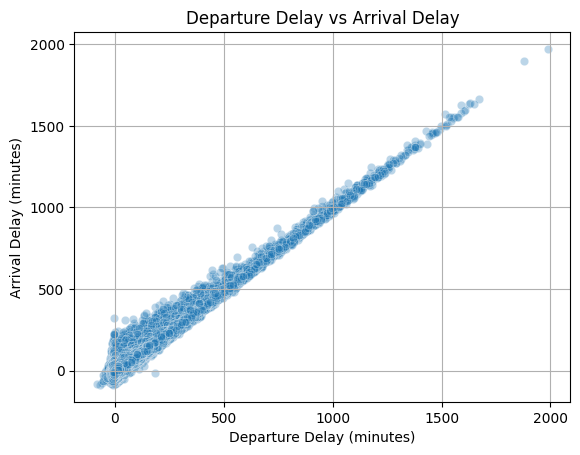

In [15]:
# Departure delay vs Arrival delay 
# To see if flights that leave late also arrive late.

sns.scatterplot(
    data=df,
    x="DEPARTURE_DELAY",
    y="ARRIVAL_DELAY",
    alpha=0.3  # makes the points a bit transparent
)

plt.title("Departure Delay vs Arrival Delay")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Arrival Delay (minutes)")
plt.grid(True)  
plt.show()

In [16]:
#This shows a strong linear relationship between departure delay and arrival delay.
#When a flight leaves late, it usually arrives late by a similar amount. 
#we can see that there are only a few points below the general trend,
#showing that in some cases the flight was able to reduce part of the delay during the way.
#There are a few extreme cases, but the general pattern is very clear.

In [17]:
# Get full rows for lowest 5 AIR_TIME
low5_rows = df.nsmallest(5, "AIR_TIME")[["AIR_TIME", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT"]]

# Get full rows for highest 5 AIR_TIME
top5_rows = df.nlargest(5, "AIR_TIME")[["AIR_TIME", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT"]]

print("Lowest 5 Air Times (with routes):")
print(low5_rows)

print("\nHighest 5 Air Times (with routes):")
print(top5_rows)

# See if these 5 flights come from one route or from many different routes
print("\nUnique lowest routes:")
print(low5_rows.groupby(["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"]).size());

print("\nUnique highest routes:")
print(top5_rows.groupby(["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"]).size());


Lowest 5 Air Times (with routes):
         AIR_TIME ORIGIN_AIRPORT DESTINATION_AIRPORT
717451        7.0            WRG                 PSG
940745        7.0            PSG                 WRG
2731846       7.0            PSG                 WRG
2778272       7.0            WRG                 PSG
3008622       7.0            WRG                 PSG

Highest 5 Air Times (with routes):
         AIR_TIME ORIGIN_AIRPORT DESTINATION_AIRPORT
1196149     690.0            JFK                 HNL
5359716     690.0            JFK                 HNL
1031625     687.0            JFK                 HNL
1081600     687.0            JFK                 HNL
593256      684.0            JFK                 HNL

Unique lowest routes:
ORIGIN_AIRPORT  DESTINATION_AIRPORT
PSG             WRG                    2
WRG             PSG                    3
dtype: int64

Unique highest routes:
ORIGIN_AIRPORT  DESTINATION_AIRPORT
JFK             HNL                    5
dtype: int64


In [18]:
# At first, we thought that a value of 7 minutes as "air time" might suggest an error with the data, 
# since it's so low.
# However, we noticed that those flights are from the same 2 airports - which as we explored are in alaska,
# and this 7 minutes flight route does actually exists-
# this flight route is between two island in alaska (therefore, legit data)

In [19]:
# Taxi Out stats
top5_taxi_out = df["TAXI_OUT"].nlargest(5)
low5_taxi_out = df["TAXI_OUT"].nsmallest(5)
taxi_out_mean = df["TAXI_OUT"].mean()
taxi_out_std = df["TAXI_OUT"].std()

print("Taxi Out Summary")
print("Lowest 5 values (in mins):")
print(low5_taxi_out.values)

print("\nHighest 5 values (in mins):")
print(top5_taxi_out.values)

print(f"\nMean Taxi Out: {taxi_out_mean:.2f} minutes")
print(f"Standard deviation: {taxi_out_std:.2f} minutes")


Taxi Out Summary
Lowest 5 values (in mins):
[1. 1. 1. 1. 1.]

Highest 5 values (in mins):
[225. 200. 185. 181. 180.]

Mean Taxi Out: 16.07 minutes
Standard deviation: 8.90 minutes


In [20]:
df["TAXI_OUT"].nsmallest(500)

26162      1.0
32050      1.0
40677      1.0
44995      1.0
102065     1.0
          ... 
4360835    2.0
4361503    2.0
4384466    2.0
4398009    2.0
4410912    2.0
Name: TAXI_OUT, Length: 500, dtype: float64

In [21]:
# How rare is it that Taxi-Out is only 1 min?

count_1 = (df["TAXI_OUT"] == 1).sum()
total = df["TAXI_OUT"].notna().sum() #notna counts
percent_1 = (count_1 / total) * 100

print(f"Flights with TAXI_OUT = 1: {count_1}")
print(f"Total flights with TAXI_OUT recorded: {total}")
print(f"Percentage: {percent_1:.2f}%")


Flights with TAXI_OUT = 1: 220
Total flights with TAXI_OUT recorded: 5730032
Percentage: 0.00%


In [22]:
# Taxi In stats
top5_taxi_in = df["TAXI_IN"].nlargest(5)
low5_taxi_in = df["TAXI_IN"].nsmallest(5)
taxi_in_mean = df["TAXI_IN"].mean()
taxi_in_std = df["TAXI_IN"].std()

print("Taxi In Summary")
print("Lowest 5 values (in mins):")
print(low5_taxi_in.values)

print("\nHighest 5 values (in mins):")
print(top5_taxi_in.values)

print(f"\nMean Taxi In: {taxi_in_mean:.2f} minutes")
print(f"Standard deviation: {taxi_in_std:.2f} minutes")


Taxi In Summary
Lowest 5 values (in mins):
[1. 1. 1. 1. 1.]

Highest 5 values (in mins):
[248. 202. 197. 184. 183.]

Mean Taxi In: 7.43 minutes
Standard deviation: 5.64 minutes


In [23]:
# Elapsed Time stats (taxi-in + air time + taxi-out)
top5_elapsed = df["ELAPSED_TIME"].nlargest(5)
low5_elapsed = df["ELAPSED_TIME"].nsmallest(5)
elapsed_mean = df["ELAPSED_TIME"].mean()
elapsed_std = df["ELAPSED_TIME"].std()

print("Elapsed Time Summary")
print("Lowest 5 values (in mins):")
print(low5_elapsed.values)

print("\nHighest 5 values (in mins):")
print(top5_elapsed.values)

print(f"\nMean Elapsed Time: {elapsed_mean:.2f} minutes")
print(f"Standard deviation: {elapsed_std:.2f} minutes")


Elapsed Time Summary
Lowest 5 values (in mins):
[14. 14. 14. 15. 15.]

Highest 5 values (in mins):
[766. 735. 733. 731. 730.]

Mean Elapsed Time: 137.01 minutes
Standard deviation: 74.21 minutes


In [24]:
# Distance stats
top5_dist = df["DISTANCE"].nlargest(5)
low5_dist = df["DISTANCE"].nsmallest(5)
dist_mean = df["DISTANCE"].mean()
dist_std = df["DISTANCE"].std()

print("Distance Summary")
print("Lowest 5 values (in miles): ")
print(low5_dist.values)

print("\nHighest 5 values (in miles):")
print(top5_dist.values)

print(f"\nMean Distance: {dist_mean:.2f} miles")
print(f"Standard deviation: {dist_std:.2f} miles")


Distance Summary
Lowest 5 values (in miles): 
[21 31 31 31 31]

Highest 5 values (in miles):
[4983 4983 4983 4983 4983]

Mean Distance: 822.36 miles
Standard deviation: 607.78 miles


In [9]:
#We have decided to create a new column - "TOTAL DELAY": the sum of dep. delay and arr. delay.

df["TOTAL_DELAY"] = df[["DEPARTURE_DELAY", "ARRIVAL_DELAY"]].sum(axis=1, min_count=1)
# Total Delay stats
top5_total_delay = df["TOTAL_DELAY"].nlargest(5)
low5_total_delay = df["TOTAL_DELAY"].nsmallest(5)
total_delay_mean = df["TOTAL_DELAY"].mean()
total_delay_std = df["TOTAL_DELAY"].std()

print("Total Delay Summary")
print("Lowest 5 values (in mins):")
print(low5_total_delay.values)

print("\nHighest 5 values (in mins):")
print(top5_total_delay.values)

print(f"\nMean Total Delay: {total_delay_mean:.2f} minutes")
print(f"Standard deviation: {total_delay_std:.2f} minutes")



Total Delay Summary
Lowest 5 values (in mins):
[-162. -155. -138. -115. -113.]

Highest 5 values (in mins):
[3959. 3776. 3335. 3285. 3269.]

Mean Total Delay: 13.76 minutes
Standard deviation: 75.10 minutes


In [26]:
df['SCHEDULED_TIME']


0          205.0
1          280.0
2          286.0
3          285.0
4          235.0
           ...  
5819074    320.0
5819075    227.0
5819076    221.0
5819077    161.0
5819078    221.0
Name: SCHEDULED_TIME, Length: 5819079, dtype: float64

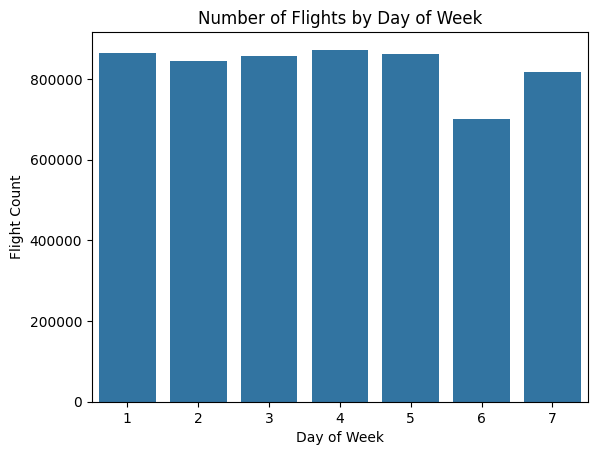

In [27]:
# Counting number of flights by day of the week
# To show how many flights happened on each day.

sns.countplot(data=df, x="DAY_OF_WEEK")
plt.title("Number of Flights by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Flight Count")
plt.show()


In [28]:
#1=monday, 7=sunday
#The graph shows that most days of the week have a similar number of flights,
#except for day 6, which has significantly fewer flights.
#This suggests that saturdays are less busy, and it may influence delay patterns.

In [29]:
#Unsupervised learning 

In [12]:
df_clean = df_encoded.dropna() 
#No need to run again after one time 


In [31]:
df_clean.shape 

(5714008, 1295)

In [32]:
#As you can see above, we've a lot of data
#This causes memory problems, so we decided to take a sample of it
df_sample = df_clean.sample(n=30000, random_state=sample_random_state)
df_sample.columns


Index(['YEAR', 'MONTH', 'DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF',
       ...
       'DESTINATION_AIRPORT_WYS', 'DESTINATION_AIRPORT_XNA',
       'DESTINATION_AIRPORT_YAK', 'DESTINATION_AIRPORT_YUM', 'DAY_OF_WEEK_2',
       'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6',
       'DAY_OF_WEEK_7'],
      dtype='object', length=1295)

In [33]:
#checking
df_sample.shape

(30000, 1295)

In [34]:
# Checking (we don't want the target column will be) 

if "TOTAL_DELAY" in df_sample:
    print("Column exists")
else:
    print("Column does not exist")

Column does not exist


In [35]:
#We will remove unnecessary column 
#Right now this column has no meaning. 
#If we want to make it useful, we could connect to an API to understand the meaning of each value 
#and then use it for learning. This was an idea we had, but we didn’t implement it because we don't
#have enough time. 

df_kmeans = df_sample.drop(columns=['TAIL_NUMBER'])
df_kmeans.shape

(30000, 1294)

In [36]:
#Saving memory
X_kmeans = df_kmeans.to_numpy(dtype='float32')


k = 2, inertia = 79006654464.0
k = 3, inertia = 58595860480.0
k = 4, inertia = 51607670784.0
k = 5, inertia = 46568964096.0
k = 6, inertia = 39713214464.0
k = 7, inertia = 35155410944.0
k = 8, inertia = 33812549632.0
k = 9, inertia = 32049854464.0
k = 10, inertia = 28167743488.0


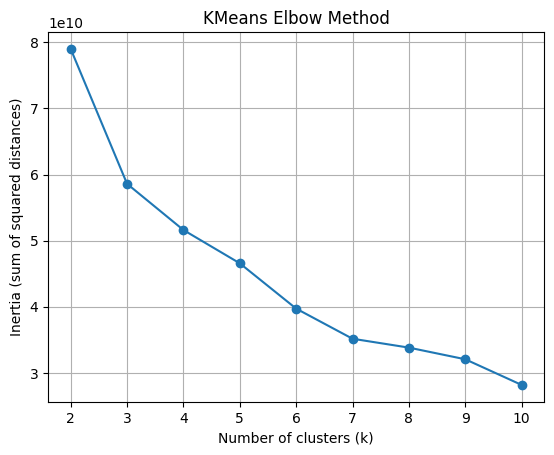

In [39]:
# KMeans with elbow method

# creating list that will store the inertia value(sum of squared distances
#to cluster centers) for each k
elbow_inertia = [] 

cluster_range = range(2, 11) #range between 2-10 

for k in cluster_range:
    
    kmeans = MiniBatchKMeans(
        n_clusters=k,
        random_state=sample_random_state,
        batch_size=10000
    )

    kmeans.fit(X_kmeans)
    elbow_inertia.append(kmeans.inertia_)
    
    print(f"k = {k}, inertia = {kmeans.inertia_}")



# k values on the x-axis and inertia on the y-axis
plt.plot(list(cluster_range), elbow_inertia, marker='o')
plt.title('KMeans Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (sum of squared distances)')
plt.grid(True)
plt.show()

In [41]:
#The Elbow Method shows a strong drop in inertia from k=2 to k=3, 
#and the curve starts to flatten after k=3–4. 
#This means that adding more clusters beyond 3 or 4 gives only small improvement. 
#Therefore, the most reasonable number of clusters is around k=3 or k=4

In [42]:
# We take a smaller sample (10,000 rows) only for the Silhouette score to 
# avoid memory problems 

sil_indices = np.random.choice(X_kmeans.shape[0], size=10000, replace=False)

X_sil = X_kmeans[sil_indices]

k = 2, Silhouette Score = 0.4356
k = 3, Silhouette Score = 0.3327
k = 4, Silhouette Score = 0.3018
k = 5, Silhouette Score = 0.2895
k = 6, Silhouette Score = 0.2711
k = 7, Silhouette Score = 0.2898
k = 8, Silhouette Score = 0.2479
k = 9, Silhouette Score = 0.2510
k = 10, Silhouette Score = 0.2646


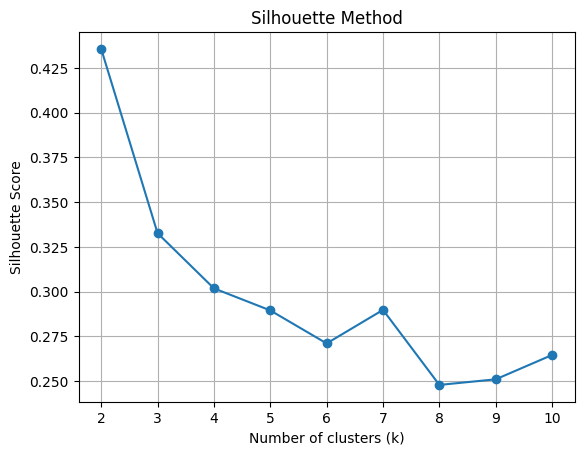

In [44]:
# KMeans with Silhouette Method 

# list that will store the silhouette score for each k
silhouette_scores = []

cluster_range = range(2, 11) #range between 2-10 

for k in cluster_range:
    
     kmeans = MiniBatchKMeans(
        n_clusters=k,
        random_state=sample_random_state,
        batch_size=1000
        )
    
     labels_full = kmeans.fit_predict(X_kmeans)
    
     labels_sil = labels_full[sil_indices]
    
     # Compute silhouette score
     score = silhouette_score(X_sil, labels_sil)
     silhouette_scores.append(score)
    
     print(f"k = {k}, Silhouette Score = {score:.4f}")

# k values on the x-axis and silhouette score on the y-axis
plt.plot(list(cluster_range), silhouette_scores, marker='o')
plt.title("Silhouette Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [45]:
#The Silhouette results show that k=2 has the highest score, 
#meaning these cluster structure are the most natural in the data. 
#After it, there is a sharp drop that keeps decreasing as k increases
#Therefore, the optimal number of clusters is k=2. 

In [46]:
#Conclusion 
#Both methods point to a very small optimal number of clusters, between 2 and 3.
#The Elbow method recommends k=3, while the Silhouette method prefers k=2.
#Since Silhouette considered more reliable we will use k=2.

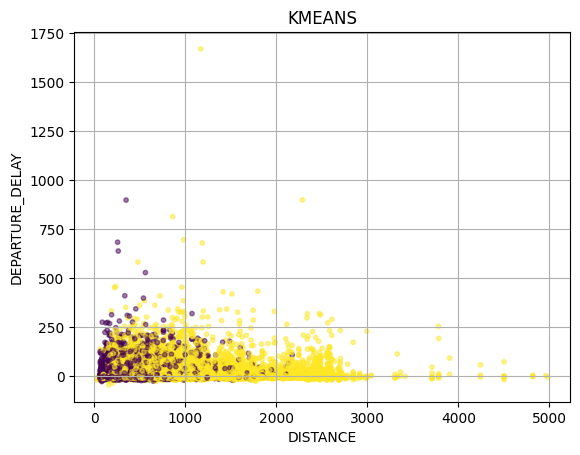

In [47]:
#KMeans with k=2 
#Columns: DISTANCE, DEPARTURE_DELAY
kmeans = MiniBatchKMeans(n_clusters=2, random_state=sample_random_state, batch_size=1000)
labels = kmeans.fit_predict(X_kmeans)

plt.scatter(
    df_kmeans['DISTANCE'],
    df_kmeans['DEPARTURE_DELAY'],
    c=labels,
    s=10,
    alpha=0.5
)

plt.title("KMEANS")
plt.xlabel("DISTANCE")
plt.ylabel("DEPARTURE_DELAY")
plt.grid(True)
plt.show()

In [48]:
#Conclusion 
#The KMeans model with k=2 mainly separates flights based on distance.
#The purple cluster includes mostly short-distance flights,
#while the yellow cluster contains also long-distance flights.
#It seems that Departure delay does not affect the clustering,
#as both clusters show similar delay ranges.

In [49]:
#We will show another KMeans with k=2 but with different columns
#Columns: AIR_TIME, ARRIVAL_DELAY

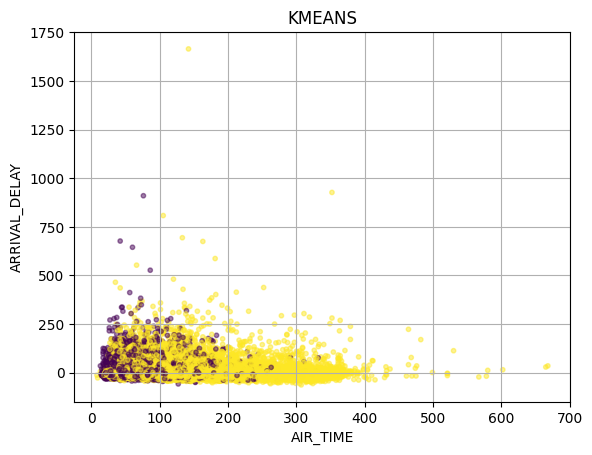

In [50]:
plt.scatter(
    df_kmeans['AIR_TIME'],
    df_kmeans['ARRIVAL_DELAY'],
    c=labels,   
    s=10,
    alpha=0.5
)

plt.title("KMEANS")
plt.xlabel("AIR_TIME")
plt.ylabel("ARRIVAL_DELAY")
plt.grid(True)
plt.show()

In [51]:
#The graph shows that the purple cluster includes flights with short air times,
#while the yellow cluster contains also flights with long air times.
#This strengthens our understanding that the KMeans model mainly separated the data 
#based on flight length:
#short flights (purple): short distance and short air time, 
#versus short, medium and long flights (yellow).

In [52]:
# To avoid memory problems we will work on a smaller sample

tsne_indices = np.random.choice(X_kmeans.shape[0], size=5000 , replace=False)


In [53]:
#We take only these rows from X_kmeans and from the KMeans labels
X_tsne_input = X_kmeans[tsne_indices]
labels_tsne = labels[tsne_indices]  

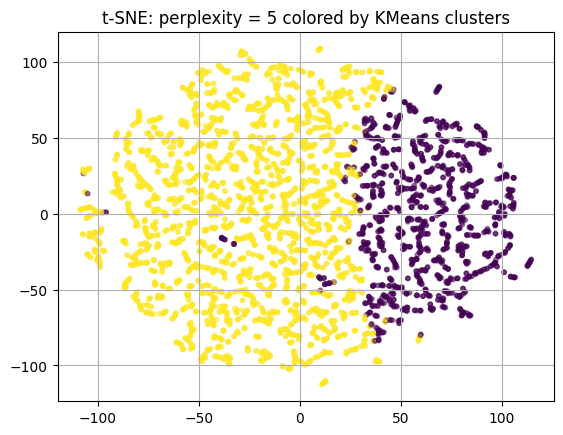

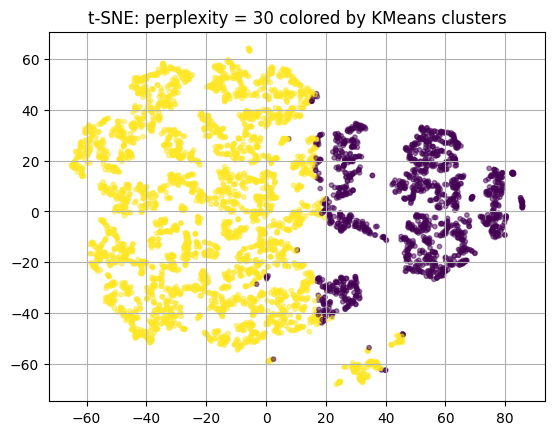

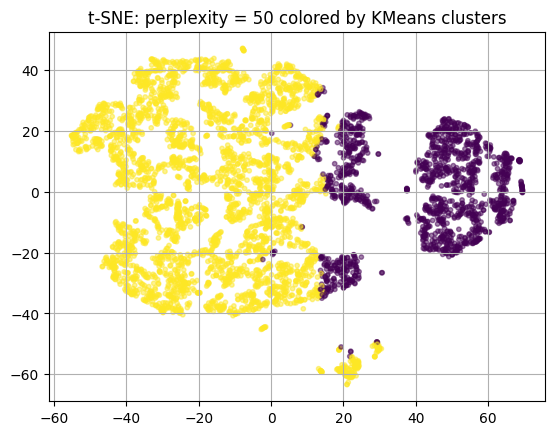

In [54]:
#Different perplexity values
perplexities = [5, 30, 50]

for p in perplexities:
    tsne = TSNE(
        n_components=2,
        perplexity=p,
        random_state=sample_random_state,
    )

    X_tsne = tsne.fit_transform(X_tsne_input)

    plt.figure()
    plt.scatter(
        X_tsne[:, 0],
        X_tsne[:, 1],
        c=labels_tsne,   # coloring by the KMeans clusters
        s=10,
        alpha=0.5
    )
    plt.title(f"t-SNE: perplexity = {p} colored by KMeans clusters")
    plt.grid(True)
    plt.show()

In [55]:
#Conclusions:
#1)We noticed that perplexity 30 and 50 produce very similar results:
#the shapes and boundaries of the clusters look almost the same in both runs.
#This suggests that increasing perplexity beyond 30 does not add new information
#and the visualization becomes stable.
#2)Across all perplexity values, the purple group stays compact while the yellow
#group spreads wider.
#3)The sepration in perplexity 30 is better than perplexity 5. 

In [56]:
# MDS
#We will run MDS by euclidean dissmilarity

In [57]:
# We will use only part od the data to avoid memory problems 
mds_indices = np.random.choice(X_kmeans.shape[0], size=2000, replace=False)

In [58]:
#We take only these rows from X_kmeans and from the KMeans labels
X_mds_input = X_kmeans[mds_indices]
labels_mds = labels[mds_indices]   

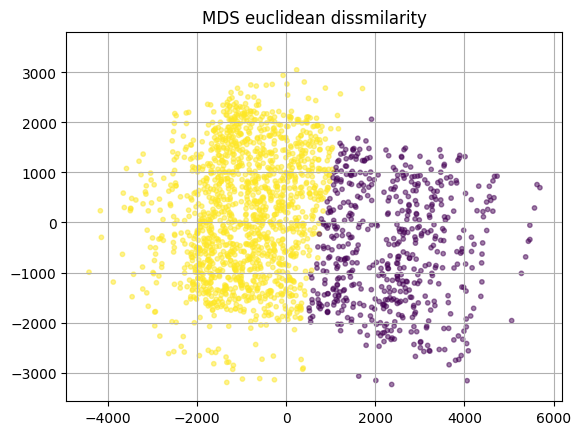

In [59]:
#MDS
#Defalut is by euclidean dissimilarity
mds = MDS(
    n_components=2,
    random_state=sample_random_state
)

X_mds = mds.fit_transform(X_mds_input)

plt.scatter(
    X_mds[:, 0],
    X_mds[:, 1],
    c=labels_mds,
    s=10,
    alpha=0.5
)

plt.title("MDS euclidean dissmilarity")
plt.grid(True)
plt.show()

In [60]:
#Conclusion: 
#1)The strong separation between the two clusters shows that the distance between the groups is much larger
#than the distance within each group. This means the difference between the two types of flights is
#meaningful. 

#2)The separation happens mainly along the horizontal axis, this means that the difference between the 
#clusters is driven mainly by one dominant direction in the data, which likely relates to the general 
#length of the flights and the features connected to it.

In [61]:
#ISOMAP

In [62]:
# We will use only part od the data to avoid memory problems 

isomap_indices = np.random.choice(X_kmeans.shape[0], size=3000, replace=False)

In [63]:
#We take only these rows from X_kmeans and from the KMeans labels
X_isomap_input = X_kmeans[isomap_indices]
labels_isomap = labels[isomap_indices]

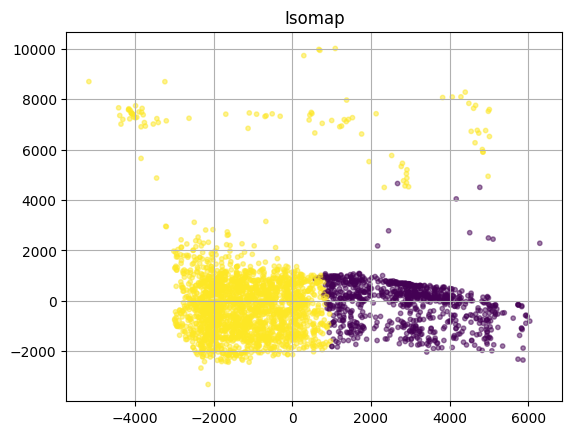

In [64]:
# n_neighbors controls how many neighbors we use for the manifold structure
# We decided to define it because the default value is 5 and it small for our data
isomap = Isomap(
    n_components=2,
    n_neighbors=10
)

X_isomap = isomap.fit_transform(X_isomap_input)

plt.scatter(
    X_isomap[:, 0],
    X_isomap[:, 1],
    c=labels_isomap,
    s=10,
    alpha=0.5
)

plt.title("Isomap")
plt.grid(True)
plt.show()

In [65]:
#In Isomap the two clusters are separated also along the horizontal axis.
#Even when using a method based on geodesic distances instead of straight-line
#distances, the data still forms two clearly distinct and stable groups.

#Isomap highlights the internal differences within each cluster very well:
#inside the yellow cluster, there is a wide range of horizontal and vertical spread,
#while inside the purple cluster, there are smaller and more compact sub-groups.

In [66]:
#PCA

In [66]:
#We start by preprocessing the relevant numerical features.
#Then apply dimensionality reduction using PCA.
features = [
    'DEPARTURE_DELAY',
    'ARRIVAL_DELAY',
    'AIR_TIME',
    'ELAPSED_TIME',
    'DISTANCE',
    'TAXI_OUT',
    'TAXI_IN'
]

X = df_clean[features] #creating new Dataframe

In [67]:
#Standardize the data: mean = 0, std = 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled shape:", X_scaled.shape)

Scaled shape: (5714008, 7)


In [68]:
# We decided to do reduction to 2 principal components (R^2)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [69]:
print("Explained variance ratio:", pca.explained_variance_ratio_) # eigenvalues (two largest)

Explained variance ratio: [0.42977408 0.28412104]


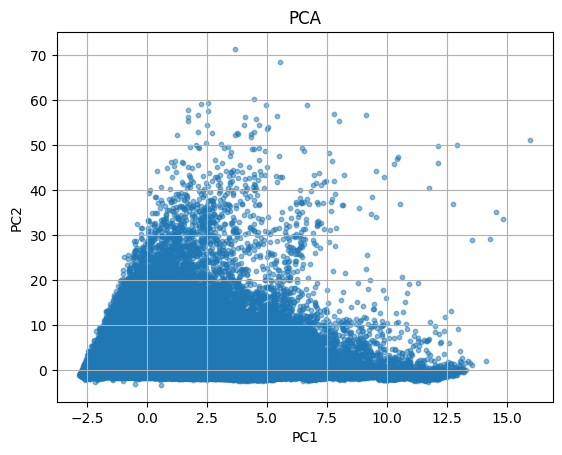

In [70]:
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    s=10,
    alpha=0.5
)

plt.title("PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

In [71]:
#The PCA results show that the first principal component explains about 43% of the total variance, 
#meaning it captures the most dominant pattern in the dataset. The second component explains about 28%
#of the variance. Together, the two components explain more than 70% of the dataset’s variability.
# The scatter plot shows a clear structure, meaning that the flights are not distributed
# randomly but follow meaningful patterns in the data.

In [72]:
# We will transform the high-dimensional data into 2 PCA components
# and color the points by the K-Means cluster labels.
# The clustering does not change, only the visualization space changes.

In [73]:
pca_indices = np.random.choice(X_kmeans.shape[0], size=5000, replace=False)

In [74]:

X_pca_input = X_kmeans[pca_indices]
labels_pca = labels[pca_indices]

Explained variance ratio: [0.62413144 0.25036952]


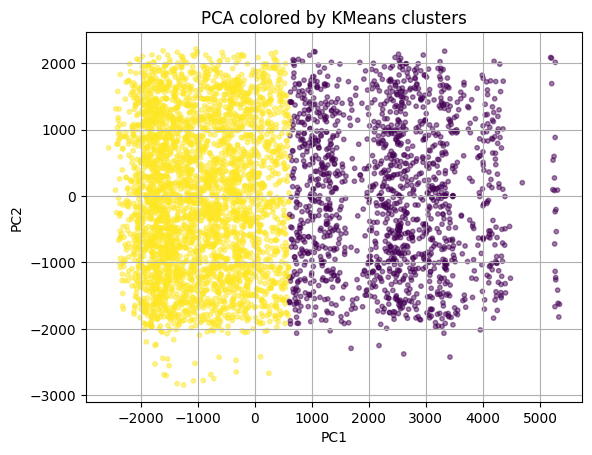

In [75]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca_input)

print("Explained variance ratio:", pca.explained_variance_ratio_) #eigenvalues (two largest)

plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=labels_pca,   # same clusters from KMeans
    s=10,
    alpha=0.5
)

plt.title("PCA colored by KMeans clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

In [76]:
#The PCA visualization shows a clear separation of the two K-Means clusters along the first
#principal component (PC1). 
#PC2 adds additional variation but does not contribute to the cluster separation.

In [113]:
########## We continue to supervised learning -regression 

In [13]:
# Sample 200,000 rows for the regression task
df_reg = df.sample(n=10_000) 
## NOTE: Eyal's station lacks ram severely, therefore sample was shrinked to 10K. In simha's station the sample can be rasied to 200K

# Remove rows where TOTAL_DELAY is NaN (cannot train regression on these)
df_reg = df_reg[df_reg['TOTAL_DELAY'].notna()]

# Target variable for regression
y_reg = df_reg['TOTAL_DELAY']

# Valid features for predicting delay (no leakage)
regression_features = [
    'MONTH',
    'DAY_OF_WEEK',
    'AIRLINE',
    'ORIGIN_AIRPORT',
    'DESTINATION_AIRPORT',
    'DISTANCE',
    'SCHEDULED_TIME'
]

X_reg = df_reg[regression_features]

print("Shape:", df_reg.shape)


Shape: (9854, 26)


In [14]:
### ONE HOT 
categorical_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
numeric_cols = ['MONTH', 'DAY_OF_WEEK', 'DISTANCE', 'SCHEDULED_TIME']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cats = encoder.fit_transform(X_reg[categorical_cols])

encoded_cats_df = pd.DataFrame(
    encoded_cats,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_reg.index
)

# Combine numeric and encoded categorical features
X_reg_encoded = pd.concat([X_reg[numeric_cols], encoded_cats_df], axis=1)

X_reg_encoded.head()


,MONTH,DAY_OF_WEEK,DISTANCE,SCHEDULED_TIME,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,...,DESTINATION_AIRPORT_TUS,DESTINATION_AIRPORT_TVC,DESTINATION_AIRPORT_TXK,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
711942,2,2,452,125.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1569861,4,6,296,80.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169072,1,1,1179,186.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
572021,2,6,647,119.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1392367,3,2,2158,268.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg_encoded,
    y_reg,
    test_size=0.2,
)

scaler_reg = StandardScaler()
X_reg_train_scaled = scaler_reg.fit_transform(X_reg_train)
X_reg_test_scaled = scaler_reg.transform(X_reg_test)

print("Train shape:", X_reg_train_scaled.shape)
print("Test shape:", X_reg_test_scaled.shape)


Train shape: (7883, 839)
Test shape: (1971, 839)


In [19]:
# Regression neural network: WE will start with Input -> 2 hidden layers -> 1 numeric output
input_dim_reg = X_reg_train_scaled.shape[1]

reg_model = keras.Sequential([
    layers.Input(shape=(input_dim_reg,)),
    layers.Dense(200, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(1) 
])

reg_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [20]:
# Train the regression model
history_reg = reg_model.fit(
    X_reg_train_scaled,
    y_reg_train,
    epochs=30,
    validation_split=0.2,
    verbose=1
)


Epoch 1/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5193.0547 - mae: 35.1666 - val_loss: 4600.8281 - val_mae: 38.0185
Epoch 2/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4265.3120 - mae: 36.3188 - val_loss: 4653.3555 - val_mae: 37.7837
Epoch 3/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4818.5400 - mae: 37.1697 - val_loss: 4795.2837 - val_mae: 39.1852
Epoch 4/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4524.7344 - mae: 37.0443 - val_loss: 4928.0088 - val_mae: 40.2230
Epoch 5/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4365.0703 - mae: 36.0847 - val_loss: 5005.1055 - val_mae: 41.2990
Epoch 6/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4232.5093 - mae: 35.0880 - val_loss: 5246.6699 - val_mae: 42.4389
Epoch 7/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3985.6738 - mae: 34.5074 - val_loss: 5561.1006 - val_mae: 44.5598
Epoch 8/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4102.3838 - mae: 34.6922 - val_loss: 5362.2563 - val_mae: 

In [21]:
# Evaluate on test set
test_loss_reg, test_mae_reg = reg_model.evaluate(X_reg_test_scaled, y_reg_test, verbose=0)

print("Test MAE (minutes):", round(test_mae_reg, 3))
print("Test MSE:", round(test_loss_reg, 3))


Test MAE (minutes): 45.963
Test MSE: 9548.558


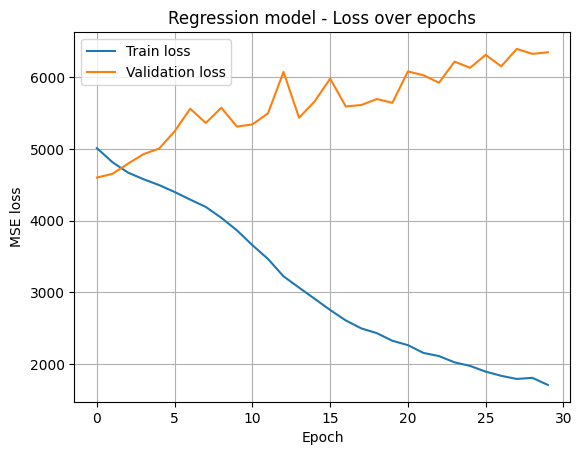

In [22]:
plt.plot(history_reg.history['loss'], label='Train loss')
plt.plot(history_reg.history['val_loss'], label='Validation loss')

plt.title('Regression model - Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE loss')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# It is evident that 2 hidden layers were probably too much and an overfitting has happened.
#Therefore we will try again with one hidden layer


In [24]:
# Smaller regression model: one hidden layer
reg_model_small = keras.Sequential([
    layers.Input(shape=(input_dim_reg,)),
    layers.Dense(100, activation='relu'),
    layers.Dense(1)
])

reg_model_small.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)



In [25]:
# Train the smaller regression model
history_reg_small = reg_model_small.fit(
    X_reg_train_scaled,
    y_reg_train,
    epochs=30,
    validation_split=0.2,
    verbose=1
)


Epoch 1/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5401.2534 - mae: 34.4493 - val_loss: 4608.6562 - val_mae: 36.1885
Epoch 2/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5635.8281 - mae: 38.3127 - val_loss: 4612.0845 - val_mae: 37.5639
Epoch 3/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4278.4927 - mae: 35.8643 - val_loss: 4646.7837 - val_mae: 38.5212
Epoch 4/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4679.1650 - mae: 37.8345 - val_loss: 4678.3657 - val_mae: 38.4476
Epoch 5/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4669.6650 - mae: 37.3730 - val_loss: 4720.7139 - val_mae: 38.8814
Epoch 6/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4627.6021 - mae: 36.0785 - val_loss: 4763.7944 - val_mae: 39.4116
Epoch 7/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4261.2812 - mae: 35.8621 - val_loss: 4808.3198 - val_mae: 39.9138
Epoch 8/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4753.9951 - mae: 37.1755 - val_loss: 4817.3911 - val_mae: 

In [26]:
# Evaluate on test set
test_loss_reg, test_mae_reg = reg_model_small.evaluate(X_reg_test_scaled, y_reg_test, verbose=0)

print("Test MAE (minutes):", round(test_mae_reg, 3))
print("Test MSE:", round(test_loss_reg, 3))


Test MAE (minutes): 51.28
Test MSE: 16996.711


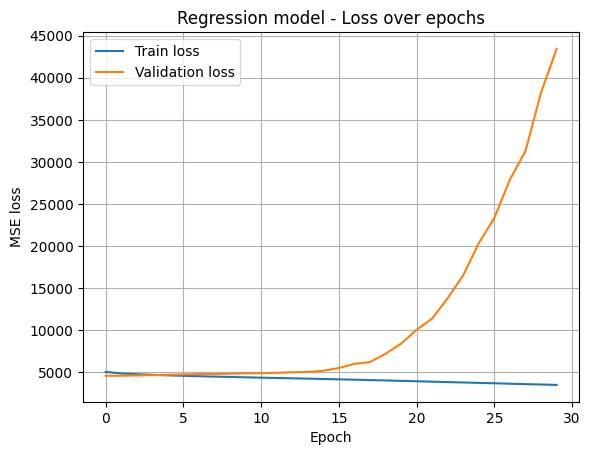

In [27]:
plt.plot(history_reg_small.history['loss'], label='Train loss')
plt.plot(history_reg_small.history['val_loss'], label='Validation loss')

plt.title('Regression model - Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE loss')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
## We can see that the validation loss rises at around epoch 20 and overfitting is ouccring again.
#Therefore, Let's try again with an early stopping at 5

In [29]:
reg_model_small_es = keras.Sequential([
    layers.Input(shape=(input_dim_reg,)),
    layers.Dense(200, activation='relu'),
    layers.Dense(1)
])

reg_model_small_es.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)



In [30]:
# Train the smaller regression model
history_reg_small_es = reg_model_small.fit(
    X_reg_train_scaled,
    y_reg_train,
    epochs=20,
    validation_split=0.2,
    verbose=1,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=5, 
        restore_best_weights=True
)])


Epoch 1/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3065.5620 - mae: 30.1028 - val_loss: 48658.6172 - val_mae: 76.9245
Epoch 2/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3483.6199 - mae: 31.9931 - val_loss: 56461.5859 - val_mae: 80.0273
Epoch 3/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3904.0132 - mae: 33.1598 - val_loss: 62256.5742 - val_mae: 82.3672
Epoch 4/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3158.6335 - mae: 30.3755 - val_loss: 68643.3047 - val_mae: 84.1779
Epoch 5/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3124.6816 - mae: 30.5951 - val_loss: 77424.1250 - val_mae: 87.7422
Epoch 6/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2984.2727 - mae: 30.1395 - val_loss: 82945.2031 - val_mae: 88.9634


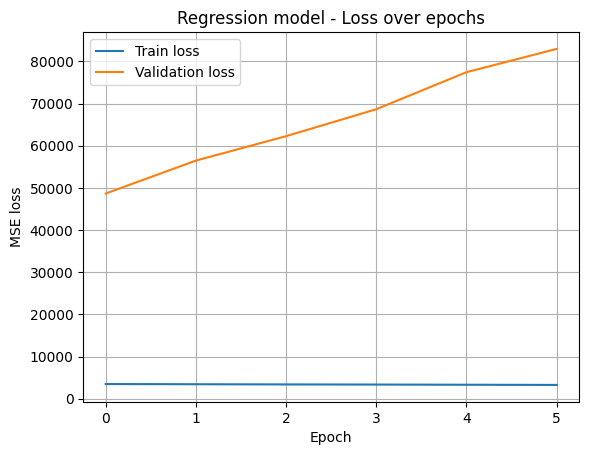

In [31]:
plt.plot(history_reg_small_es.history['loss'], label='Train loss')
plt.plot(history_reg_small_es.history['val_loss'], label='Validation loss')

plt.title('Regression model - Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE loss')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
## Raising the numbers of neurons actually made it worse. Let's try lowering it

In [33]:
reg_model_small_es_low_n = keras.Sequential([
    layers.Input(shape=(input_dim_reg,)),
    layers.Dense(100, activation='relu'),
    layers.Dense(1)
])

reg_model_small_es_low_n.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)



In [34]:
# Train the smaller regression model
reg_model_small_es_low_n = reg_model_small.fit(
    X_reg_train_scaled,
    y_reg_train,
    epochs=30,
    validation_split=0.2,
    verbose=1,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=5, 
        restore_best_weights=True
)])


Epoch 1/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3370.2754 - mae: 31.4093 - val_loss: 53123.0000 - val_mae: 78.1526
Epoch 2/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3144.3389 - mae: 30.0898 - val_loss: 62216.1719 - val_mae: 82.2763
Epoch 3/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3459.6680 - mae: 31.1482 - val_loss: 67947.4609 - val_mae: 83.9727
Epoch 4/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2904.9688 - mae: 29.3263 - val_loss: 75670.3438 - val_mae: 86.8859
Epoch 5/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3300.7036 - mae: 29.9618 - val_loss: 83027.1641 - val_mae: 89.4334
Epoch 6/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2885.7793 - mae: 29.5307 - val_loss: 92329.2969 - val_mae: 92.2821


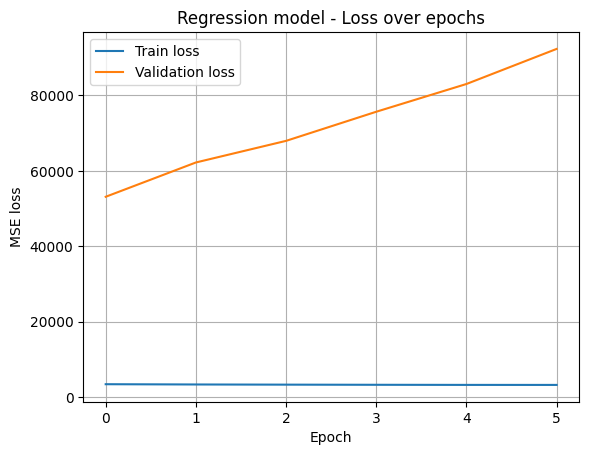

In [35]:
plt.plot(reg_model_small_es_low_n.history['loss'], label='Train loss')
plt.plot(reg_model_small_es_low_n.history['val_loss'], label='Validation loss')

plt.title('Regression model - Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE loss')
plt.legend()
plt.grid(True)
plt.show()

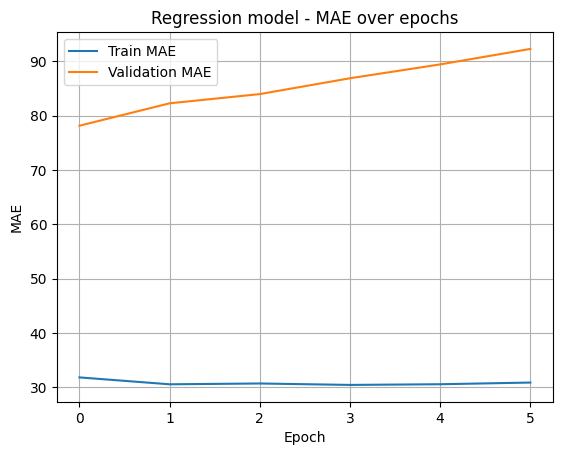

In [36]:

plt.plot(reg_model_small_es_low_n.history['mae'], label='Train MAE')
plt.plot(reg_model_small_es_low_n.history['val_mae'], label='Validation MAE')

plt.title('Regression model - MAE over epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.show()


In [37]:
### MAE still looks too high. Let's test the NN with liner regression

In [40]:
linear_model_sklearn = LinearRegression()
linear_model_sklearn.fit(X_reg_train_scaled, y_reg_train)
y_pred = linear_model_sklearn.predict(X_reg_test_scaled)
test_mae = mean_absolute_error(y_reg_test, y_pred)

print(f"Linear Regression Results:")
print(f"Test MAE: {test_mae:.2f} minutes")

Linear Regression Results:
Test MAE: 40.32 minutes


In [41]:
###### EVEN A LINEAR REGRESSION GETS LOWER MAE. 
### This means that regulation must be added to the NN.. Dropout this thing! 

In [ ]:
# Returning to the smaller regression model, but now empowering it with a lil Dropout

reg_model_dropout = keras.Sequential([
    # Input layer
    layers.Input(shape=(input_dim_reg,)),
    layers.Dense(100, activation='relu'),
    
    # Dropout layer to prevent overfitting
    # 0.2 means 20% of the neurons will be randomly dropped during training
    layers.Dropout(0.2),
    layers.Dense(1)
])

# Compile the model
reg_model_dropout.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

# Train the model with Dropout
history_reg_dropout = reg_model_dropout.fit(
    X_reg_train_scaled,
    y_reg_train,
    epochs=30,
    validation_split=0.2,
    
    verbose=1,
    callbacks=[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=5
)

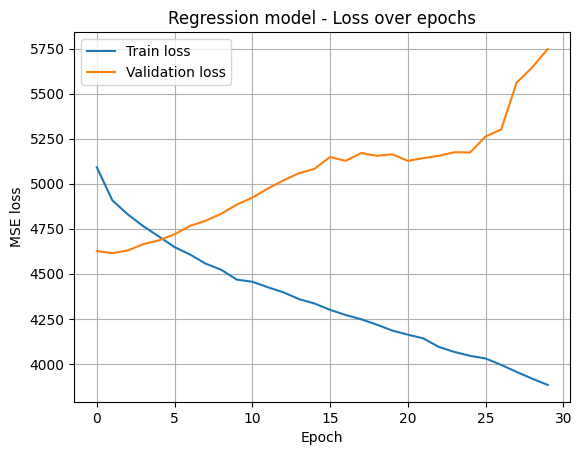

In [53]:
plt.plot(history_reg_dropout.history['loss'], label='Train loss')
plt.plot(history_reg_dropout.history['val_loss'], label='Validation loss')

plt.title('Regression model - Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE loss')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
from keras import regularizers, callbacks

# Regression model with Dropout + L2 Regularization
reg_model_robust = keras.Sequential([
    layers.Input(shape=(input_dim_reg,)),
    
    # Added L2 Regularization to the Dense layer
    # 'l2(0.01)' applies a penalty ensuring weights don't get too large
    layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    
    # Dropout layer (keeping your previous setting)
    layers.Dropout(0.2),
    
    layers.Dense(1)
])

reg_model_robust.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

# Define Early Stopping callback
# This monitors validation loss and stops training if it doesn't improve
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',       # Watch the validation loss
    patience=5,               # Stop after 5 epochs with no improvement
)

# Train the model including the callback
# We can now set epochs to a higher number (e.g., 100) safely
history_reg_robust = reg_model_robust.fit(
    X_reg_train_scaled,
    y_reg_train,
    epochs=100,               # Increased max epochs because Early Stopping controls it
    validation_split=0.2,
    callbacks=[early_stopping], # Add the callback here
    verbose=1
)

Epoch 1/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5304.0854 - mae: 34.7812 - val_loss: 4628.5713 - val_mae: 35.7524
Epoch 2/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5365.8379 - mae: 36.8826 - val_loss: 4615.9517 - val_mae: 37.3562
Epoch 3/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4303.4487 - mae: 36.0983 - val_loss: 4632.8032 - val_mae: 38.0349
Epoch 4/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4875.7637 - mae: 37.6492 - val_loss: 4652.5820 - val_mae: 38.0650
Epoch 5/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4528.5234 - mae: 36.0433 - val_loss: 4688.4448 - val_mae: 38.8351
Epoch 6/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4560.7842 - mae: 37.1903 - val_loss: 4718.7627 - val_mae: 38.7750
Epoch 7/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4496.7305 - mae: 35.8849 - val_loss: 4759.9106 - val_mae: 39.3037


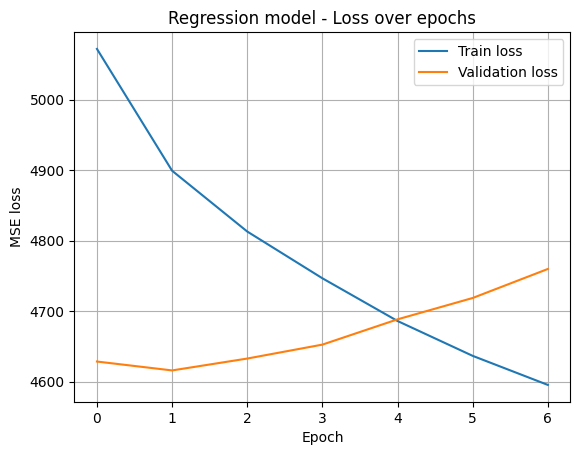

In [45]:
plt.plot(history_reg_robust.history['loss'], label='Train loss')
plt.plot(history_reg_robust.history['val_loss'], label='Validation loss')

plt.title('Regression model - Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE loss')
plt.legend()
plt.grid(True)
plt.show()

In [54]:

# Create a Ridge Regression model. Refrence: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html


# 'alpha' controls the regularization strength. 
# Higher alpha = stronger regularization (less overfitting, but risk of underfitting).
ridge_model = Ridge(alpha=1.0) 

# Train the model
ridge_model.fit(X_reg_train_scaled, y_reg_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_reg_test_scaled)

# Evaluate results
mae_ridge = mean_absolute_error(y_reg_test, y_pred_ridge)
print(f"Ridge Regression Results:")
print(f"Test MAE: {mae_ridge:.2f} minutes")

Ridge Regression Results:
Test MAE: 40.32 minutes


In [48]:
#Already better, let's try with a higher alpha 

In [49]:
ridge_model2 = Ridge(alpha=5.0) 

# Train the model
ridge_model2.fit(X_reg_train_scaled, y_reg_train)

# Predict on the test set
y_pred_ridge = ridge_model2.predict(X_reg_test_scaled)

# Evaluate results
mae_ridge = mean_absolute_error(y_reg_test, y_pred_ridge)
print(f"Ridge Regression Results:")
print(f"Test MAE: {mae_ridge:.2f} minutes")

Ridge Regression Results:
Test MAE: 40.32 minutes
